<a href="https://colab.research.google.com/github/raiharshit47/test/blob/main/ANN_Customer_Churn_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
Files = files.upload()

Saving WA_Fn-UseC_-Telco-Customer-Churn.csv to WA_Fn-UseC_-Telco-Customer-Churn.csv


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [ ]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df.drop('customerID', axis='columns', inplace=True)
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [ ]:
df.TotalCharges.values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [ ]:
df.MonthlyCharges.values

array([ 29.85,  56.95,  53.85, ...,  29.6 ,  74.4 , 105.65])

In [ ]:
pd.to_numeric(df.TotalCharges, errors='coerce').isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Name: TotalCharges, Length: 7043, dtype: bool

In [ ]:
df[pd.to_numeric(df.TotalCharges, errors='coerce').isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [ ]:
df.shape

(7043, 20)

In [ ]:
df.iloc[488]

gender                                 Female
SeniorCitizen                               0
Partner                                   Yes
Dependents                                Yes
tenure                                      0
PhoneService                               No
MultipleLines                No phone service
InternetService                           DSL
OnlineSecurity                            Yes
OnlineBackup                               No
DeviceProtection                          Yes
TechSupport                               Yes
StreamingTV                               Yes
StreamingMovies                            No
Contract                             Two year
PaperlessBilling                          Yes
PaymentMethod       Bank transfer (automatic)
MonthlyCharges                          52.55
TotalCharges                                 
Churn                                      No
Name: 488, dtype: object

In [ ]:
df1 = df[df.TotalCharges!=' ']
df1.shape

(7032, 20)

In [ ]:
df1.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [ ]:
df1.TotalCharges = pd.to_numeric(df1.TotalCharges)

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [ ]:
df1.TotalCharges.dtypes

dtype('float64')

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


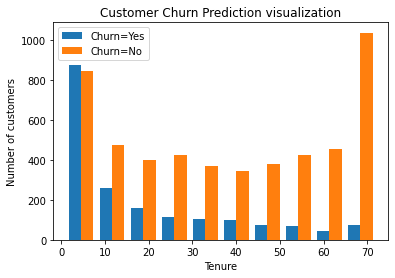

In [ ]:
tenure_churn_no = df1[df1.Churn=='No'].tenure
tenure_churn_yes = df1[df1.Churn=='Yes'].tenure

plt.hist([tenure_churn_yes, tenure_churn_no], label=['Churn=Yes', 'Churn=No'])
plt.xlabel("Tenure")
plt.ylabel("Number of customers")
plt.title("Customer Churn Prediction visualization")

plt.legend()

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


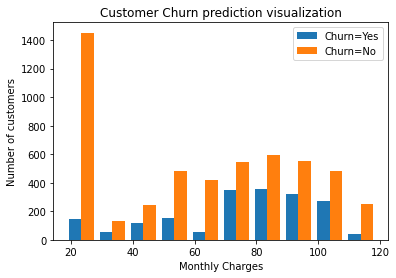

In [ ]:
mc_churn_no = df1[df1.Churn=="No"].MonthlyCharges
mc_churn_yes = df1[df1.Churn=="Yes"].MonthlyCharges

plt.xlabel("Monthly Charges")
plt.ylabel("Number of customers")
plt.title("Customer Churn prediction visualization")

blood_sugar_men = [113, 85, 90, 150, 149, 88, 93, 115, 135, 80, 77, 82, 129]
blood_sugar_women = [67, 98, 89, 120, 133, 150, 84, 69, 89, 79, 120, 112, 100]

plt.hist([mc_churn_yes, mc_churn_no], label=["Churn=Yes", "Churn=No"])
plt.legend()

In [ ]:
def print_unique_col_values(df):
  for column in df:
    if df[column].dtypes == "object":
      print(f'{column} : {df[column].unique()}')

In [ ]:
print_unique_col_values(df1)

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


In [ ]:
df1.replace('No internet service', 'No', inplace=True)
df1.replace('No phone service', 'No', inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5244: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


In [ ]:
print_unique_col_values(df1)

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes']
OnlineBackup : ['Yes' 'No']
DeviceProtection : ['No' 'Yes']
TechSupport : ['No' 'Yes']
StreamingTV : ['No' 'Yes']
StreamingMovies : ['No' 'Yes']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


In [ ]:
yes_no_columns = ['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies',
                  'PaperlessBilling','Churn']

for col in yes_no_columns:
  df1[col].replace({'Yes': 1, 'No': 0}, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [ ]:
for col in df1:
  print(f'{col} : {df1[col].unique()}')

gender : ['Female' 'Male']
SeniorCitizen : [0 1]
Partner : [1 0]
Dependents : [0 1]
tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService : [0 1]
MultipleLines : [0 1]
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : [0 1]
OnlineBackup : [1 0]
DeviceProtection : [0 1]
TechSupport : [0 1]
StreamingTV : [0 1]
StreamingMovies : [0 1]
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : [1 0]
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges : [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges : [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn : [0 1]


In [ ]:
df1['gender'].replace({'Female':1, 'Male':0}, inplace=True)
df1['gender'].unique()

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


array([1, 0])

In [ ]:
df2 = pd.get_dummies(data=df1, columns=['InternetService','Contract','PaymentMethod'])
df2.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [ ]:
df2.sample(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
543,0,0,0,0,10,1,1,0,0,0,0,1,0,1,86.05,834.1,1,0,1,0,1,0,0,1,0,0,0
3840,0,1,1,0,64,1,1,0,0,0,0,0,0,0,25.65,1740.8,0,0,0,1,0,0,1,0,1,0,0
235,0,0,0,0,2,1,1,0,1,0,0,0,0,1,54.40,114.1,1,1,0,0,1,0,0,0,0,0,1


In [ ]:
df2.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_DSL                          uint8
InternetService_Fiber optic                  uint8
InternetService_No             

In [ ]:
cols_to_scale = ['tenure','MonthlyCharges','TotalCharges']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

df2[cols_to_scale] = scaler.fit_transform(df2[cols_to_scale])


In [ ]:
df2.sample(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
4272,0,0,1,0,0.774648,1,1,0,0,0,0,0,0,1,0.068657,0.150975,1,0,0,1,0,0,1,0,1,0,0
2216,1,1,0,0,0.887324,1,1,1,0,1,1,1,1,1,0.902488,0.818428,0,0,1,0,1,0,0,1,0,0,0
5381,0,0,1,0,0.436620,1,1,0,0,1,0,0,0,1,0.603483,0.280308,1,0,1,0,1,0,0,0,0,1,0
5018,1,0,1,1,1.000000,1,0,0,0,0,0,0,0,0,0.014428,0.157051,0,0,0,1,0,0,1,0,1,0,0
3794,0,0,1,0,0.098592,1,0,0,1,1,0,0,0,1,0.363184,0.049279,0,1,0,0,1,0,0,0,0,0,1


In [ ]:
for col in df2:
  print(f'{col}: {df2[col].unique()}')

gender: [1 0]
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [0.         0.46478873 0.01408451 0.61971831 0.09859155 0.29577465
 0.12676056 0.38028169 0.85915493 0.16901408 0.21126761 0.8028169
 0.67605634 0.33802817 0.95774648 0.71830986 0.98591549 0.28169014
 0.15492958 0.4084507  0.64788732 1.         0.22535211 0.36619718
 0.05633803 0.63380282 0.14084507 0.97183099 0.87323944 0.5915493
 0.1971831  0.83098592 0.23943662 0.91549296 0.11267606 0.02816901
 0.42253521 0.69014085 0.88732394 0.77464789 0.08450704 0.57746479
 0.47887324 0.66197183 0.3943662  0.90140845 0.52112676 0.94366197
 0.43661972 0.76056338 0.50704225 0.49295775 0.56338028 0.07042254
 0.04225352 0.45070423 0.92957746 0.30985915 0.78873239 0.84507042
 0.18309859 0.26760563 0.73239437 0.54929577 0.81690141 0.32394366
 0.6056338  0.25352113 0.74647887 0.70422535 0.35211268 0.53521127]
PhoneService: [0 1]
MultipleLines: [0 1]
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [

In [ ]:
X = df2.drop('Churn', axis='columns')
y = df2['Churn']

In [ ]:
y

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7032, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 5)

In [ ]:
X_train.shape

(5625, 26)

In [ ]:
X_test.shape

(1407, 26)

In [ ]:
X_train[:10]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
5664,1,1,0,0,0.126761,1,0,0,0,1,0,0,1,1,0.660199,0.097709,0,1,0,1,0,0,0,1,0,0
101,1,0,1,1,0.000000,1,0,0,0,0,0,0,0,0,0.011940,0.000075,0,0,1,1,0,0,0,0,1,0
2621,0,0,1,0,0.985915,1,0,0,1,1,1,1,1,1,0.605473,0.639978,1,0,0,0,0,1,0,1,0,0
392,1,1,0,0,0.014085,1,0,0,0,0,0,0,0,1,0.259204,0.008135,1,0,0,1,0,0,0,0,1,0
1327,0,0,1,0,0.816901,1,1,0,0,1,0,1,1,1,0.808458,0.685703,0,1,0,0,1,0,1,0,0,0
3607,1,0,0,0,0.169014,1,0,1,0,0,1,0,0,0,0.367164,0.083556,1,0,0,0,1,0,0,0,0,1
2773,0,0,1,0,0.323944,0,0,0,0,1,0,0,0,0,0.107960,0.077221,1,0,0,1,0,0,0,0,1,0
1936,1,0,1,0,0.704225,1,0,1,1,0,1,0,0,1,0.420398,0.360760,1,0,0,0,1,0,1,0,0,0
5387,0,0,0,0,0.042254,0,0,0,0,0,1,0,0,0,0.121891,0.011493,1,0,0,1,0,0,0,0,1,0
4331,0,0,0,0,0.985915,1,1,0,0,0,0,0,0,0,0.072637,0.216859,0,0,1,0,0,1,1,0,0,0


In [ ]:
y_train.shape

(5625,)

In [ ]:
len(X_train.columns)

26

In [ ]:
import tensorflow as tf
from tensorflow import keras

model = keras.Sequential([
                          keras.layers.Dense(20 ,input_shape=(26,), activation = 'relu'),
                          keras.layers.Dense(1 , activation = 'sigmoid')
])

model.compile(
    optimizer='adam',
    loss = 'binary_crossentropy',
    metrics = ['accuracy']
)

model.fit(X_train, y_train, epochs=100)

Epoch 1/100
176/176 [==============================] - 1s 2ms/step - loss: 0.5541 - accuracy: 0.7010
Epoch 2/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4369 - accuracy: 0.7916
Epoch 3/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4235 - accuracy: 0.7973
Epoch 4/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4176 - accuracy: 0.8011
Epoch 5/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4146 - accuracy: 0.8039
Epoch 6/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4130 - accuracy: 0.8020
Epoch 7/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4123 - accuracy: 0.8052
Epoch 8/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4111 - accuracy: 0.8059
Epoch 9/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4104 - accuracy: 0.8053
Epoch 10/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4090 - accura

In [ ]:
model.evaluate(X_test, y_test)

44/44 [==============================] - 0s 1ms/step - loss: 0.4469 - accuracy: 0.7861


[0.4469274878501892, 0.7860696315765381]

In [ ]:
yp = model.predict(X_test)
yp[:5]

array([[0.21848372],
       [0.47139183],
       [0.01262918],
       [0.79372674],
       [0.69597167]], dtype=float32)

In [ ]:
y_test[:10]

2660    0
744     0
5579    1
64      1
3287    1
816     1
2670    0
5920    0
1023    0
6087    0
Name: Churn, dtype: int64

In [ ]:
y_pred = []
for element in yp:
  if element>0.5:
    y_pred.append(1)
  else:
    y_pred.append(0)


In [ ]:
y_pred[:10]

[0, 0, 0, 1, 1, 1, 0, 1, 0, 0]

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.87      0.85       999
           1       0.65      0.57      0.61       408

    accuracy                           0.79      1407
   macro avg       0.74      0.72      0.73      1407
weighted avg       0.78      0.79      0.78      1407



Text(69.0, 0.5, 'Truth')

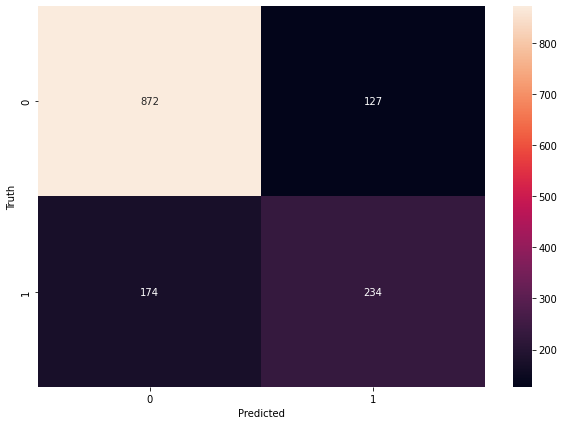

In [ ]:
import seaborn as sns
cm = tf.math.confusion_matrix(labels= y_test, predictions = y_pred)

plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
round((867+230)/(867+132+178+230), 2) #accuracy

0.78

In [ ]:
# Precision for 0 class
round((867)/(867+178), 2)

0.83

In [ ]:
# Precision for 1 class
round((230)/(230+132), 2)

0.64

In [ ]:
# Recall for 0 class
round((867)/(867+132), 2)

0.87

In [ ]:
# Recall for 1 class
round((230)/(230+178), 2)

0.56

In [ ]:
def ANN(X_train, y_train, X_test, y_test, loss, weights):
  model = keras.Sequential([
                          keras.layers.Dense(20 ,input_shape=(26,), activation = 'relu'),
                          keras.layers.Dense(15, activation='relu'),
                          keras.layers.Dense(1 , activation = 'sigmoid')
  ])

  model.compile(
    optimizer='adam',
    loss = loss,
    metrics = ['accuracy']
  )

  if weights==-1:
    model.fit(X_train, y_train, epochs=100)
  else:
    model.fit(X_train, y_train, epochs=100, class_weight = weights)
  
  print(model.evaluate(X_test, y_test))

  y_preds = model.predict(X_test)
  y_preds = np.round(y_preds)

  print("Classification Report: \n", classification_report(y_test, y_preds))

  return y_preds

In [ ]:
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
176/176 [==============================] - 1s 2ms/step - loss: 0.5088 - accuracy: 0.7479
Epoch 2/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4320 - accuracy: 0.7916
Epoch 3/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4207 - accuracy: 0.7988
Epoch 4/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4176 - accuracy: 0.8002
Epoch 5/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4151 - accuracy: 0.8023
Epoch 6/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4124 - accuracy: 0.8052
Epoch 7/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4125 - accuracy: 0.8023
Epoch 8/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4095 - accuracy: 0.8048
Epoch 9/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4089 - accuracy: 0.8052
Epoch 10/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4074 - accura

In [ ]:
# Method 1 : Undersampling

# Class count
count_class_0, class_count_1 = df2.Churn.value_counts()

# Divide by class
df_class_0 = df2[df2['Churn'] == 0]
df_class_1 = df2[df2['Churn'] == 1]

In [ ]:
count_class_0, class_count_1

(5163, 1869)

In [ ]:
df_class_0.shape

(5163, 27)

In [ ]:
df_class_0_under = df_class_0.sample(class_count_1)

In [ ]:
df_test_under = pd.concat([df_class_0_under, df_class_1], axis=0)
df_test_under.shape

(3738, 27)

In [ ]:
print("Random Under-sampling: ")
print(df_test_under.Churn.value_counts())

Random Under-sampling: 
0    1869
1    1869
Name: Churn, dtype: int64


In [ ]:
X = df_test_under.drop('Churn', axis='columns')
y = df_test_under['Churn']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 15, stratify=y)

In [ ]:
y_train.value_counts()

0    1495
1    1495
Name: Churn, dtype: int64

In [ ]:
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
94/94 [==============================] - 1s 2ms/step - loss: 0.6386 - accuracy: 0.6368
Epoch 2/100
94/94 [==============================] - 0s 2ms/step - loss: 0.5292 - accuracy: 0.7465
Epoch 3/100
94/94 [==============================] - 0s 2ms/step - loss: 0.5043 - accuracy: 0.7528
Epoch 4/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4953 - accuracy: 0.7585
Epoch 5/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4910 - accuracy: 0.7609
Epoch 6/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4884 - accuracy: 0.7582
Epoch 7/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4852 - accuracy: 0.7625
Epoch 8/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4815 - accuracy: 0.7656
Epoch 9/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4801 - accuracy: 0.7669
Epoch 10/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4796 - accuracy: 0.7679
Epoch 11/

In [ ]:
# Method 2: Over sampling
count_class_0, class_count_1

(5163, 1869)

In [ ]:
df_class_1_over = df_class_1.sample(count_class_0, replace=True)

In [ ]:
df_class_1_over.shape

(5163, 27)

In [ ]:
df_test_over = pd.concat([df_class_0, df_class_1_over], axis=0)
df_test_over.shape

(10326, 27)

In [ ]:
print("Random Over-sampling: ")
print(df_test_over.Churn.value_counts())

Random Over-sampling: 
0    5163
1    5163
Name: Churn, dtype: int64


In [ ]:
X = df_test_over.drop('Churn', axis='columns')
y = df_test_over['Churn']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 15, stratify=y)

In [ ]:
y_train.value_counts()

1    4130
0    4130
Name: Churn, dtype: int64

In [ ]:
y_test.value_counts()

1    1033
0    1033
Name: Churn, dtype: int64

In [ ]:
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
259/259 [==============================] - 1s 2ms/step - loss: 0.5668 - accuracy: 0.7142
Epoch 2/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4966 - accuracy: 0.7625
Epoch 3/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4893 - accuracy: 0.7638
Epoch 4/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4861 - accuracy: 0.7667
Epoch 5/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4832 - accuracy: 0.7696
Epoch 6/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4796 - accuracy: 0.7699
Epoch 7/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4781 - accuracy: 0.7752
Epoch 8/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4750 - accuracy: 0.7749
Epoch 9/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4729 - accuracy: 0.7751
Epoch 10/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4718 - accura

In [ ]:
#Method 3 : SMOTE
X = df2.drop('Churn', axis='columns')
y = df2['Churn']



In [ ]:
!pip install imbalanced-learn

from imblearn.over_sampling import SMOTE

In [ ]:
smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_resample(X, y)

y_sm.value_counts()

0    5163
1    5163
Name: Churn, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.2, random_state = 15, stratify=y_sm)

In [ ]:
y_train.value_counts()

1    4130
0    4130
Name: Churn, dtype: int64

In [ ]:
y_test.value_counts()

1    1033
0    1033
Name: Churn, dtype: int64

In [ ]:
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
259/259 [==============================] - 1s 3ms/step - loss: 0.5330 - accuracy: 0.7372
Epoch 2/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4708 - accuracy: 0.7776
Epoch 3/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4647 - accuracy: 0.7814
Epoch 4/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4605 - accuracy: 0.7826
Epoch 5/100
259/259 [==============================] - 1s 2ms/step - loss: 0.4568 - accuracy: 0.7846
Epoch 6/100
259/259 [==============================] - 1s 2ms/step - loss: 0.4521 - accuracy: 0.7880
Epoch 7/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4481 - accuracy: 0.7893
Epoch 8/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4431 - accuracy: 0.7936
Epoch 9/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4394 - accuracy: 0.7966
Epoch 10/100
259/259 [==============================] - 1s 2ms/step - loss: 0.4355 - accura

In [ ]:
# Method 4: use of ensemble with under sampling
df2.Churn.value_counts()

0    5163
1    1869
Name: Churn, dtype: int64

In [ ]:
X = df2.drop('Churn', axis='columns')
y = df2['Churn']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 15, stratify=y)

In [ ]:
y_train.value_counts()

0    4130
1    1495
Name: Churn, dtype: int64

In [ ]:
df3 = X_train.copy()
df3['Churn'] = y_train

In [ ]:
df3_class0 = df3[df3.Churn==0]
df3_class1 = df3[df3.Churn==1]

In [ ]:
df3_class0.shape, df3_class1.shape

((4130, 27), (1495, 27))

In [ ]:
def get_train_batch(df_majority, df_minority, start, end):
  df_train = pd.concat([df_majority[start:end], df_minority], axis=0)

  X_train = df_train.drop('Churn', axis='columns')
  y_train = df_train['Churn']

  return X_train, y_train

In [ ]:
X_train, y_train = get_train_batch(df3_class0, df3_class1, 0, 1495)

In [ ]:
X_train.shape

(2990, 26)

In [ ]:
y_pred1 = ANN(X_train ,y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
94/94 [==============================] - 1s 2ms/step - loss: 0.6229 - accuracy: 0.6870
Epoch 2/100
94/94 [==============================] - 0s 2ms/step - loss: 0.5242 - accuracy: 0.7535
Epoch 3/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4994 - accuracy: 0.7642
Epoch 4/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4931 - accuracy: 0.7672
Epoch 5/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4883 - accuracy: 0.7679
Epoch 6/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4847 - accuracy: 0.7689
Epoch 7/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4827 - accuracy: 0.7739
Epoch 8/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4793 - accuracy: 0.7716
Epoch 9/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4769 - accuracy: 0.7763
Epoch 10/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4757 - accuracy: 0.7763
Epoch 11/

In [ ]:
X_train, y_train = get_train_batch(df3_class0, df3_class1, 1495, 2990)

y_pred2 = ANN(X_train ,y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
94/94 [==============================] - 1s 3ms/step - loss: 0.6715 - accuracy: 0.6000
Epoch 2/100
94/94 [==============================] - 0s 3ms/step - loss: 0.5626 - accuracy: 0.7425
Epoch 3/100
94/94 [==============================] - 0s 4ms/step - loss: 0.5170 - accuracy: 0.7522
Epoch 4/100
94/94 [==============================] - 0s 3ms/step - loss: 0.5006 - accuracy: 0.7569
Epoch 5/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4912 - accuracy: 0.7609
Epoch 6/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4865 - accuracy: 0.7645
Epoch 7/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4827 - accuracy: 0.7632
Epoch 8/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4793 - accuracy: 0.7632
Epoch 9/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4801 - accuracy: 0.7629
Epoch 10/100
94/94 [==============================] - 0s 4ms/step - loss: 0.4752 - accuracy: 0.7692
Epoch 11/

In [ ]:
X_train, y_train = get_train_batch(df3_class0, df3_class1, 2990, 4130)

y_pred3 = ANN(X_train ,y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
83/83 [==============================] - 1s 2ms/step - loss: 0.6623 - accuracy: 0.5753
Epoch 2/100
83/83 [==============================] - 0s 2ms/step - loss: 0.5858 - accuracy: 0.6934
Epoch 3/100
83/83 [==============================] - 0s 2ms/step - loss: 0.5136 - accuracy: 0.7590
Epoch 4/100
83/83 [==============================] - 0s 2ms/step - loss: 0.4900 - accuracy: 0.7696
Epoch 5/100
83/83 [==============================] - 0s 2ms/step - loss: 0.4796 - accuracy: 0.7689
Epoch 6/100
83/83 [==============================] - 0s 2ms/step - loss: 0.4728 - accuracy: 0.7708
Epoch 7/100
83/83 [==============================] - 0s 2ms/step - loss: 0.4690 - accuracy: 0.7757
Epoch 8/100
83/83 [==============================] - 0s 2ms/step - loss: 0.4651 - accuracy: 0.7784
Epoch 9/100
83/83 [==============================] - 0s 2ms/step - loss: 0.4630 - accuracy: 0.7776
Epoch 10/100
83/83 [==============================] - 0s 2ms/step - loss: 0.4616 - accuracy: 0.7814
Epoch 11/

In [ ]:
y_pred_final = y_pred1.copy()

for i in range(len(y_pred1)):
  n_ones = y_pred1[i] + y_pred2[i] + y_pred3[i]
  if n_ones > 1:
    y_pred_final[i] = 1
  else:
    y_pred_final[i] = 0

In [ ]:
print(classification_report(y_test, y_pred_final))

              precision    recall  f1-score   support

           0       0.90      0.67      0.77      1033
           1       0.47      0.80      0.59       374

    accuracy                           0.70      1407
   macro avg       0.68      0.73      0.68      1407
weighted avg       0.79      0.70      0.72      1407



In [ ]:
from sklearn.linear_model import LogisticRegression


In [ ]:
def logr(X_train, y_train, X_test, y_test):
  lgr = LogisticRegression(random_state=0, solver='saga', class_weight='Balanced')
  model = lgr.fit(X_train, y_train)
  

  y_preds = model.predict(X_test)
  y_preds = np.round(y_preds)

  print("Classification report : \n", classification_report(y_test, y_preds))

  return y_preds

In [ ]:
X = df2.drop('Churn', axis='columns')
y = df2['Churn']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=1)

In [ ]:
logr(X_train, y_train, X_test, y_test)

Classification report : 
               precision    recall  f1-score   support

           0       0.85      0.89      0.87      1041
           1       0.63      0.54      0.58       366

    accuracy                           0.80      1407
   macro avg       0.74      0.71      0.72      1407
weighted avg       0.79      0.80      0.79      1407



array([0, 1, 0, ..., 0, 0, 0])

In [ ]:
# Method:1 Undersampling

count_class_0, count_class_1 = df2.Churn.value_counts()

df_class_0 = df2[df2.Churn==0]
df_class_1 = df2[df2.Churn==1]

In [ ]:
count_class_1

1869

In [ ]:
count_class_0

5163

In [ ]:
df_class_0.shape


(5163, 27)

In [ ]:
df_class_1.shape

(1869, 27)

In [ ]:
df_under_class_0 = df_class_0.sample(count_class_1)
df_test_under = pd.concat([df_under_class_0, df_class_1], axis=0)

print("Random Under-sampling :")
print(df_test_under.Churn.value_counts())

Random Under-sampling :
0    1869
1    1869
Name: Churn, dtype: int64


In [ ]:
X = df_test_under.drop('Churn', axis='columns')
y = df_test_under['Churn']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7, stratify=y)

In [ ]:
y_train.value_counts()

0    1495
1    1495
Name: Churn, dtype: int64

In [ ]:
X_test.shape

(748, 26)

In [ ]:
logr(X_train, y_train, X_test, y_test)

Classification report : 
               precision    recall  f1-score   support

           0       0.80      0.74      0.77       374
           1       0.76      0.81      0.78       374

    accuracy                           0.78       748
   macro avg       0.78      0.78      0.78       748
weighted avg       0.78      0.78      0.78       748



array([0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,

In [ ]:
# Method 2 : Oversampling : duplicate copy

df_class_1_over = df_class_1.sample(count_class_0, replace=True)
df_test_over = pd.concat([df_class_0, df_class_1_over], axis=0)

print("Random Over-sampling :")
print(df_test_over.Churn.value_counts())

Random Over-sampling :
0    5163
1    5163
Name: Churn, dtype: int64


In [ ]:
X = df_test_over.drop('Churn', axis='columns')
y = df_test_over['Churn']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7, stratify=y)

In [ ]:
X_train.shape

(8260, 26)

In [ ]:
y_train.value_counts()

1    4130
0    4130
Name: Churn, dtype: int64

In [ ]:
logr(X_train, y_train, X_test, y_test)

Classification report : 
               precision    recall  f1-score   support

           0       0.79      0.73      0.76      1033
           1       0.75      0.81      0.78      1033

    accuracy                           0.77      2066
   macro avg       0.77      0.77      0.77      2066
weighted avg       0.77      0.77      0.77      2066



array([0, 1, 1, ..., 0, 1, 1])

In [ ]:
X = df2.drop('Churn', axis='columns')
y = df2['Churn']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7, stratify=y)

In [ ]:
y_train.value_counts()

0    4130
1    1495
Name: Churn, dtype: int64

In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_resample(X_train, y_train)

In [ ]:
y_sm.value_counts()

0    4130
1    4130
Name: Churn, dtype: int64

In [ ]:
logr(X_sm, y_sm, X_test, y_test)

Classification report : 
               precision    recall  f1-score   support

           0       0.89      0.77      0.83      1033
           1       0.54      0.74      0.62       374

    accuracy                           0.76      1407
   macro avg       0.71      0.75      0.72      1407
weighted avg       0.80      0.76      0.77      1407



array([0, 0, 1, ..., 0, 0, 0])

In [ ]:
# Method 4: use of ensemble with under sampling
df2.Churn.value_counts()

0    5163
1    1869
Name: Churn, dtype: int64

In [ ]:
X = df2.drop('Churn', axis='columns')
y = df2['Churn']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7, stratify=y)

In [ ]:
y_train.value_counts()

0    4130
1    1495
Name: Churn, dtype: int64

In [ ]:
df3 = X_train.copy()
df3['Churn'] = y_train

In [ ]:
df3.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn
5066,0,0,1,0,0.605634,0,0,0,1,1,0,1,1,0,0.358706,0.273673,1,0,0,0,0,1,1,0,0,0,0
942,0,0,0,0,0.323944,1,0,0,0,0,0,0,1,1,0.612935,0.228733,0,1,0,1,0,0,0,1,0,0,0
6830,0,0,0,0,0.478873,1,0,0,0,0,0,0,0,1,0.019403,0.076806,0,0,1,0,0,1,0,0,0,1,0
4443,1,0,0,0,0.000000,1,0,0,0,0,0,0,0,0,0.263682,0.002994,1,0,0,1,0,0,0,0,0,1,0
4088,0,0,0,0,0.084507,1,1,0,0,0,0,0,0,0,0.550746,0.057835,0,1,0,1,0,0,0,0,1,0,1


In [ ]:
df3_class_0 = df3[df3.Churn==0]
df3_class_1 = df3[df3.Churn==1]

In [ ]:
X_train, y_train = get_train_batch(df3_class_0, df3_class_1, 0, 1495)
y_pred1 = logr(X_train, y_train, X_test, y_test)

Classification report : 
               precision    recall  f1-score   support

           0       0.92      0.74      0.82      1033
           1       0.53      0.81      0.64       374

    accuracy                           0.76      1407
   macro avg       0.72      0.78      0.73      1407
weighted avg       0.81      0.76      0.77      1407



In [ ]:
X_train, y_train = get_train_batch(df3_class_0, df3_class_1, 1495, 2990)
y_pred2 = logr(X_train, y_train, X_test, y_test)

Classification report : 
               precision    recall  f1-score   support

           0       0.91      0.73      0.81      1033
           1       0.52      0.81      0.64       374

    accuracy                           0.75      1407
   macro avg       0.72      0.77      0.73      1407
weighted avg       0.81      0.75      0.77      1407



In [ ]:
X_train, y_train = get_train_batch(df3_class_0, df3_class_1, 2990, 4130)
y_pred3 = logr(X_train, y_train, X_test, y_test)

Classification report : 
               precision    recall  f1-score   support

           0       0.93      0.67      0.78      1033
           1       0.49      0.87      0.63       374

    accuracy                           0.73      1407
   macro avg       0.71      0.77      0.71      1407
weighted avg       0.82      0.73      0.74      1407



In [ ]:
y_pred_final = y_pred1.copy()
for i in range(len(y_pred1)):
  n_ones = y_pred1[i] + y_pred2[i] + y_pred3[i]
  if n_ones>1:
    y_pred_final[i] = 1
  else:
    y_pred_final[i] = 0


In [ ]:
print(classification_report(y_pred_final , y_test))

              precision    recall  f1-score   support

           0       0.73      0.92      0.81       818
           1       0.82      0.52      0.64       589

    accuracy                           0.75      1407
   macro avg       0.77      0.72      0.72      1407
weighted avg       0.77      0.75      0.74      1407

